<img src = "https://mytechdecisions.com/wp-content/uploads/2021/02/AdobeStock_382844018-1000x500.jpeg"> <br><br>
<h1 style = "font-family: Times New Roman; font-weight: 1000; color:black">🤖 Getting Started: Natural Language Processing with Disaster Tweets</h1>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008B;
           font-size:100%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<h1 id="basics" style="color:white; font-family:Times New Roman; padding:10px"> 
    Introduction
</h1>
</div>

<span id="Introduction" style="font-size:18px; font-family:Times New Roman">Welcome to my first attempt at a Natural Language Processing competition here on Kaggle!<br><br>
    Thanks to smartphones and easy access to Internet everywhere, people are able to announce an emergency they're observing in real-time and that can be very useful to help people to avoid certain areas, to alert authorities, disaster relief organizations and news agencies. However, although a human could quite easily distinguish between a tweet that is about a real emergency and one that uses certain emergency-related words in a metaphorical way, it isn't quite the same when it comes to machines.<br><br>
    The goal of this competition is to train a machine learning model that will learn how to differentiate between a tweet about a real disaster and one that isn't.<br><br>
    To help me with that goal, I'm going to use PyCaret which is an AutoML library for Python and the reason I'm doing so is that whenever I'm learning something new about machine learning, I always like to use AutoML tools to help me observe how these models can actually work in practice!</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008B;
           font-size:100%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<h1 id="basics" style="color:white; font-family:Times New Roman; padding:10px"> 
    What is Natural Language Processing?
</h1>
</div>

<span id="Introduction" style="font-size:18px; font-family:Times New Roman"> **Natural Language Processing (NLP)** is a branch of artificial intelligence that's focused on analyzing and understanding the languages that humans use naturally in order to interface with computers in written and spoken contexts.<br><br>
    Nowadays, NLP in machine learning is used for sentiment analysis, which helps the machine to identify the mood or opinions within large amounts of text, document summarization, transforming voice commands into written text, and also automatic translation.</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008B;
           font-size:100%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<h1 id="basics" style="color:white; font-family:Times New Roman; padding:10px"> 
    👨‍💻 | Getting Started: Let's Install All Necessary Libraries
</h1>
</div>

In [2]:
# Installing numpy 1.18.5
!pip install numpy==1.18.5 --user
# Installing PyCaret
!pip install --ignore-installed pycaret --user
# Installing english language model
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 20.2 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow 2.6.4 requires absl-py~=0.10, but you have absl-py 1.1.0 which is incompat

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008B;
           font-size:100%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<h1 id="basics" style="color:white; font-family:Times New Roman; padding:10px"> 
    📈 | Getting to Know the Dataset
</h1>
</div>

In [37]:
# Importing libraries
import pandas as pd, plotly.express as px
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [4]:
# Let's take a look at train dataframe
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
# Printing the first few tweets
print(train['text'][:5])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object


In [4]:
# Counting missing values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

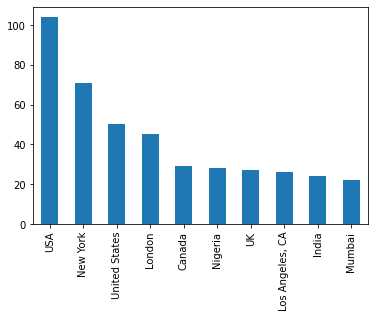

In [36]:
# Top 10 most frequent locations
train.location.value_counts()[:10].plot(kind = 'bar')

In [55]:
# Class balance
fig = px.pie(train, names = 'target', title = 'Target Distribution')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

<span id="Introduction" style="font-size:18px; font-family:Times New Roman"> **0**: Not a real disaster<br><br>
**1**: Real disaster</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008B;
           font-size:100%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<h1 id="basics" style="color:white; font-family:Times New Roman; padding:10px"> 
    🤖 | Using PyCaret's NLP Module
</h1>
</div>

<span id="Introduction" style="font-size:18px; font-family:Times New Roman">PyCaret's NLP module is an unsupervised machine learning module that's used to analyze the text data, divide text into different topics, and convert raw text into a format that machine learning algorithms can learn from<br><br>
It is also useful to automate text data treatment, such as removing numeric and special characters, word tokenization, bigram extraction, lemmatizing, and removing stopwords </span>

In [6]:
# Importing PyCaret's NLP module
from pycaret.nlp import *

In [7]:
# First attempt at setting up texts
setup(train, # Defining dataframe
      target = 'text', # Selecting target for treatment
      session_id = 123 # Defining an id for reproducement)

Description,Value
session_id,123
Documents,7613
Vocab Size,10175
Custom Stopwords,False


([['reason', 'earthquake', 'may', 'forgive'],
  ['forest', 'fire'],
  ['resident',
   'ask',
   'shelter',
   'place',
   'notify',
   'officer',
   'evacuation',
   'shelter',
   'place',
   'order',
   'expect'],
  ['people', 'receive', 'wildfire', 'evacuation', 'order'],
  ['get', 'send', 'smoke', 'wildfire', 'pour', 'school'],
  ['rockyfire', 'close', 'direction', 'due', 'fire', 'wildfire'],
  ['flood',
   'disaster',
   'cause',
   'flash',
   'flooding',
   'street',
   'spring',
   'area'],
  ['see', 'fire', 'wood'],
  ['emergency', 'evacuation', 'happen', 'building', 'street'],
  ['come', 'area'],
  ['people', 'die', 'far'],
  ['get', 'flood', 'wait', 'second', 'live', 'go', 'go', 'fvck', 'flooding'],
  ['rain', 'day', 'lose', 'count'],
  ['arrive', 'bago'],
  ['multi', 'car', 'crash', 'breaking'],
  ['man'],
  ['love', 'fruit'],
  ['summer'],
  ['car', 'fast'],
  [],
  ['ridiculous'],
  [],
  ['love', 'skiing'],
  ['wonderful'],
  [],
  ['way', 'eat', 'shit'],
  ['last', 'week

In [15]:
# Creating model
lda = create_model('lda', # Choosing Algorithm
                   num_topics = 3, # Setting 3 topics to divide texts into
                   multi_core = True)

In [16]:
df = assign_model(lda) # Assigning model to dataframe

In [17]:
df # Observing results

,id,keyword,location,text,target,Topic_0,Topic_1,Topic_2,Dominant_Topic,Perc_Dominant_Topic
0,1,NaN,NaN,reason earthquake may forgive,1,0.470143,0.452472,0.077385,Topic 0,0.47
1,4,NaN,NaN,forest fire,1,0.151453,0.111488,0.737059,Topic 2,0.74
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1,0.032474,0.028327,0.939199,Topic 2,0.94
3,6,NaN,NaN,people receive wildfire evacuation order,1,0.391009,0.207574,0.401417,Topic 2,0.40
4,7,NaN,NaN,get send smoke wildfire pour school,1,0.189862,0.760735,0.049403,Topic 1,0.76
...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two_giant_cranes_holde bridge_collapse_nearby_...,1,0.888832,0.055583,0.055585,Topic 0,0.89
7609,10870,NaN,NaN,aria_ahrary control even northern part state,1,0.209869,0.742463,0.047668,Topic 1,0.74
7610,10871,NaN,NaN,http co,1,0.777777,0.111112,0.111112,Topic 0,0.78
7611,10872,NaN,NaN,police investigate bike collide car little por...,1,0.021122,0.233151,0.745727,Topic 2,0.75


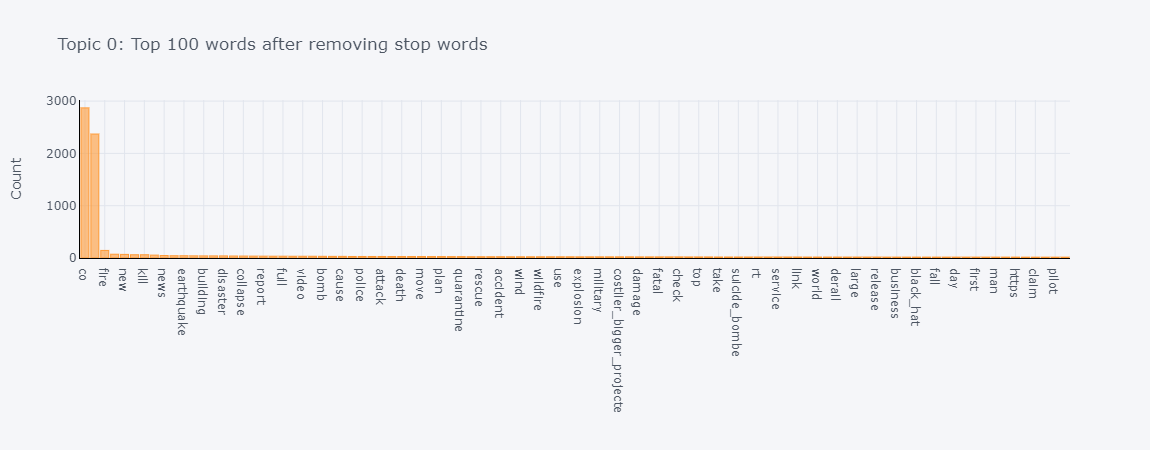

In [18]:
plot_model(lda, plot = 'frequency') # Plotting word frequency

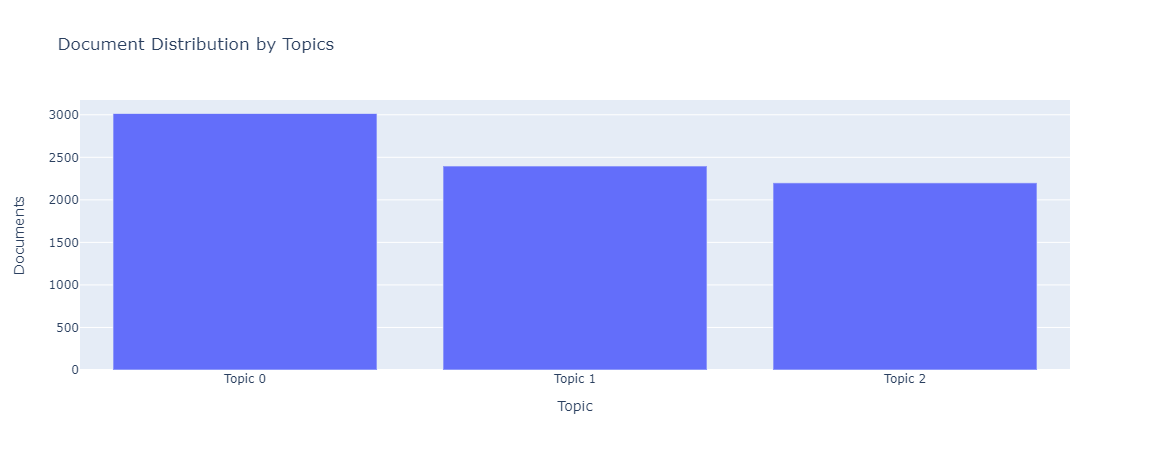

In [19]:
plot_model(lda, plot = 'topic_distribution') # Plotting topic distribution

In [20]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.001055  0.251358       1        1  36.807632
1      0.164864 -0.126786       2        1  32.817513
2     -0.163809 -0.124572       3        1  30.374855, topic_info=      Term         Freq        Total Category  logprob  loglift
73      co  3308.000000  3308.000000  Default  30.0000  30.0000
74    http  2639.000000  2639.000000  Default  29.0000  29.0000
44      go   232.000000   232.000000  Default  28.0000  28.0000
18     get   225.000000   225.000000  Default  27.0000  27.0000
430  wreck   150.000000   150.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
503    run    48.024801    71.030376   Topic3  -5.7197   0.8002
130   life    49.752952    81.259789   Topic3  -5.6843   0.7010
112   time    49.630838   105.431601   Topic3  -5.6868   0.4381
119   want    47.742333    90.751109   Topic3  -5.7256   0.5493
4     fire    48.183859   173.393307   Topic3  -5.7164  -0.0890

[178 rows x 6 columns], token_table=      Topic      Freq                                 Term
term                                                      
7917      1  0.957156  affected_fatal_outbreak_legionnaire
78        2  0.982478                               always
198       2  0.303247                                  amp
198       3  0.692195                                  amp
27        1  0.990458                                 area
...     ...       ...                                  ...
2341      3  0.008027                                wound
430       3  0.990456                                wreck
7004      1  0.978147                             wreckage
144       2  0.838586                                 year
144       3  0.151220                                 year

[216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

<span id="Introduction" style="font-size:18px; font-family:Times New Roman"> We can see that there are a high frequency of words that are irrelevant for training our model, such as *co* and *http*. We're gonna remove them by creating a list with custom stopwords, containing these words, and set up PyCaret's NLP module again</span>

In [21]:
stopwords = ['co','http','go','get'] # Creating a list with stopwords

In [23]:
# Setting up nlp again
setup(train, target = 'text',session_id = 123, 
      custom_stopwords = stopwords # Informing stop words through custom_stopwords method)

Description,Value
session_id,123
Documents,7613
Vocab Size,9150
Custom Stopwords,True


([['reason', 'earthquake', 'may', 'forgive'],
  ['forest', 'fire'],
  ['resident',
   'ask',
   'shelter',
   'place',
   'notify',
   'officer',
   'evacuation',
   'shelter',
   'place',
   'order',
   'expect'],
  ['people', 'receive', 'wildfire', 'evacuation', 'order'],
  ['send', 'smoke', 'wildfire', 'pour', 'school'],
  ['rockyfire', 'close', 'direction', 'due', 'fire', 'wildfire'],
  ['flood',
   'disaster',
   'cause',
   'flash',
   'flooding',
   'street',
   'spring',
   'area'],
  ['see', 'fire', 'wood'],
  ['emergency', 'evacuation', 'happen', 'building', 'street'],
  ['come', 'area'],
  ['people', 'die', 'far'],
  ['flood', 'wait', 'second', 'live', 'fvck', 'flooding'],
  ['rain', 'day', 'lose', 'count'],
  ['arrive', 'bago'],
  ['multi', 'car', 'crash', 'breaking'],
  ['man'],
  ['love', 'fruit'],
  ['summer'],
  ['car', 'fast'],
  [],
  ['ridiculous'],
  [],
  ['love', 'skiing'],
  ['wonderful'],
  [],
  ['way', 'eat', 'shit'],
  ['last', 'week'],
  ['love'],
  [],
  []

In [24]:
lda2 = create_model('lda')

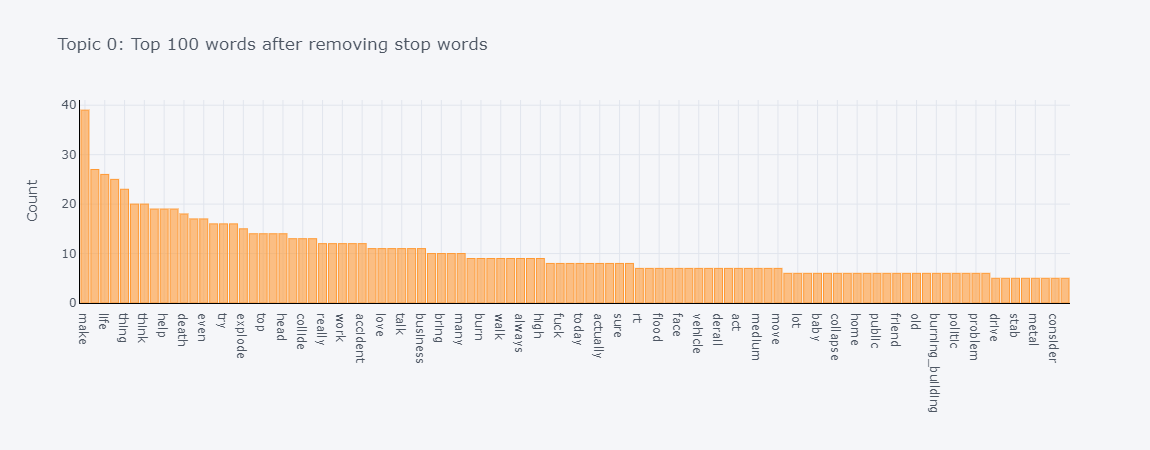

In [31]:
plot_model(lda2, plot = 'frequency') # Plotting new word frequency

/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


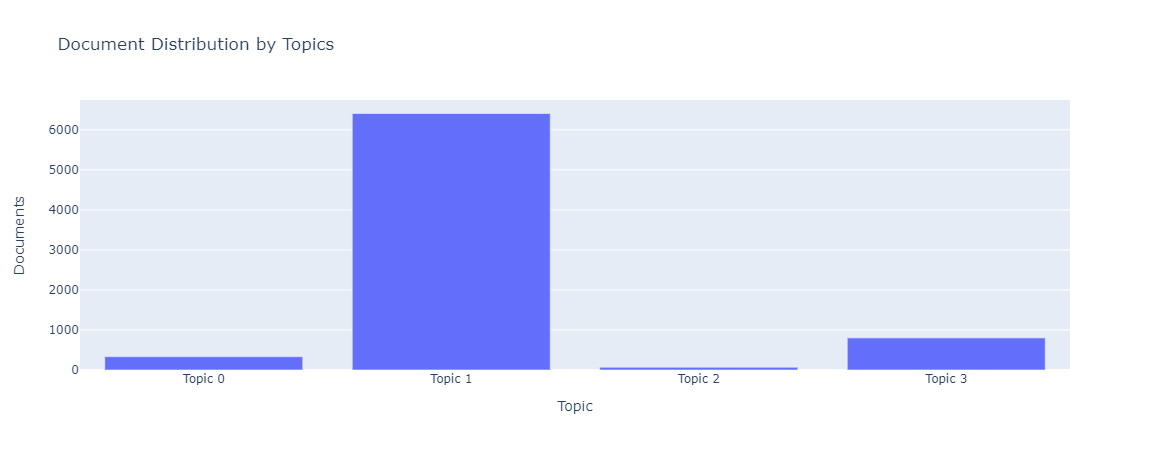

In [32]:
plot_model(lda2, plot = 'topic_distribution')

In [33]:
plot_model(lda, plot = 'topic_model')

ValidationError: 
 * Not all rows (distributions) in topic_term_dists sum to 1.

In [29]:
df2 = assign_model(lda2)

In [30]:
df2

,id,keyword,location,text,target,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,1,NaN,NaN,reason earthquake may forgive,1,0.259282,0.293136,0.208353,0.239230,Topic 1,0.29
1,4,NaN,NaN,forest fire,1,0.238444,0.295326,0.216887,0.249342,Topic 1,0.30
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1,0.209616,0.271469,0.191073,0.327842,Topic 3,0.33
3,6,NaN,NaN,people receive wildfire evacuation order,1,0.225122,0.277359,0.204791,0.292728,Topic 3,0.29
4,7,NaN,NaN,send smoke wildfire pour school,1,0.227482,0.279889,0.252931,0.239698,Topic 1,0.28
...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two_giant_cranes_holde bridge_collapse_nearby_...,1,0.242305,0.282388,0.221797,0.253510,Topic 1,0.28
7609,10870,NaN,NaN,aria_ahrary control even northern part state,1,0.239681,0.290779,0.219743,0.249797,Topic 1,0.29
7610,10871,NaN,NaN,,1,0.242687,0.283028,0.220731,0.253554,Topic 1,0.28
7611,10872,NaN,NaN,police investigate bike collide car little por...,1,0.314867,0.290563,0.183962,0.210609,Topic 0,0.31


In [37]:
# Importing PyCaret's classification module
from pycaret.classification import *

In [41]:
# Setting up data
setup(data = df2,target = 'target', train_size = 0.7,imputation_type = 'simple',
     numeric_imputation = 'mean')

,Description,Value
0,session_id,1101
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7613, 11)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


('54f0',
 False,
 [('Setup Config',
                                  Description             Value
   0                               session_id              1101
   1                                   Target            target
   2                              Target Type            Binary
   3                            Label Encoded              None
   4                            Original Data        (7613, 11)
   5                           Missing Values              True
   6                         Numeric Features                 6
   7                     Categorical Features                 4
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set      (5329, 5533)
   12                    Transformed Test Set      (2284, 5533)
   13                      Shuffle Train-Test              True
   1

In [43]:
compare_models(sort = 'F1', n_select = 3) # Sorting algorithm performance by F1 score. Selecting top 3 best models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7328,0.7932,0.7188,0.6801,0.6987,0.4590,0.4598,0.3230
knn,K Neighbors Classifier,0.6851,0.7355,0.6082,0.6430,0.6246,0.3539,0.3547,2.3240
et,Extra Trees Classifier,0.7138,0.7748,0.5376,0.7274,0.6181,0.3975,0.4092,9.1720
dt,Decision Tree Classifier,0.6641,0.6537,0.5781,0.6192,0.5974,0.3099,0.3109,0.8460
rf,Random Forest Classifier,0.7080,0.7655,0.4919,0.7438,0.5919,0.3791,0.3989,5.4570
gbc,Gradient Boosting Classifier,0.6780,0.7287,0.3518,0.7826,0.4844,0.2966,0.3472,14.0760
qda,Quadratic Discriminant Analysis,0.6607,0.6245,0.3618,0.7120,0.4771,0.2645,0.2987,21.4380
ada,Ada Boost Classifier,0.6603,0.6934,0.3374,0.7326,0.4592,0.2591,0.3015,3.8910
lr,Logistic Regression,0.6650,0.6970,0.4090,0.6353,0.4481,0.2718,0.2828,3.0800
svm,SVM - Linear Kernel,0.4988,0.0000,0.4978,0.2148,0.3002,-0.0019,-0.0220,4.1530


[GaussianNB(priors=None, var_smoothing=1e-09),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1101, verbose=0,
                      warm_start=False)]

In [44]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7111,0.7683,0.6769,0.6596,0.6681,0.4124,0.4125
1,0.7298,0.8009,0.7380,0.6680,0.7012,0.4558,0.4577
2,0.7392,0.8007,0.7261,0.6872,0.7061,0.4720,0.4726
3,0.7280,0.8001,0.7087,0.6763,0.6921,0.4487,0.4491
4,0.7298,0.7826,0.7043,0.6807,0.6923,0.4516,0.4518
5,0.7205,0.7875,0.7261,0.6601,0.6915,0.4370,0.4387
6,0.7749,0.8297,0.7348,0.7412,0.7380,0.5406,0.5406
7,0.7298,0.7745,0.7217,0.6748,0.6975,0.4539,0.4547
8,0.7373,0.7973,0.7391,0.6800,0.7083,0.4702,0.4715


In [45]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6604,0.7261,0.5808,0.6101,0.5951,0.3030,0.3032
1,0.6961,0.7527,0.6681,0.6402,0.6538,0.3832,0.3834
2,0.6848,0.7202,0.6217,0.6384,0.6300,0.3555,0.3556
3,0.6792,0.7325,0.6043,0.6347,0.6192,0.3423,0.3426
4,0.6829,0.7397,0.5957,0.6432,0.6185,0.3479,0.3487
5,0.6848,0.7178,0.6217,0.6384,0.6300,0.3555,0.3556
6,0.6904,0.7646,0.5696,0.6650,0.6136,0.3579,0.3609
7,0.7167,0.7570,0.6174,0.6927,0.6529,0.4149,0.4169
8,0.6698,0.7134,0.6174,0.6174,0.6174,0.3270,0.3270


In [46]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7017,0.7570,0.5284,0.7035,0.6035,0.3720,0.3818
1,0.7092,0.7793,0.5459,0.7102,0.6173,0.3892,0.3980
2,0.7148,0.7710,0.5522,0.7216,0.6256,0.4018,0.4112
3,0.7111,0.7776,0.5174,0.7346,0.6071,0.3893,0.4043
4,0.6979,0.7611,0.5130,0.7066,0.5945,0.3633,0.3751
5,0.7148,0.7696,0.5391,0.7294,0.6200,0.3999,0.4116
6,0.7580,0.8242,0.6043,0.7853,0.6830,0.4926,0.5037
7,0.7092,0.7657,0.5435,0.7143,0.6173,0.3897,0.3992
8,0.7167,0.7753,0.5130,0.7516,0.6098,0.3996,0.4176


In [47]:
blendedmodels_1 = blend_models(estimator_list = [nb, knn, et],
                              fold = 10, choose_better = True, optimize = 'F1',
                              method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7298,0.7706,0.6681,0.6923,0.6800,0.4464,0.4466
1,0.7542,0.7963,0.7336,0.7059,0.7195,0.5009,0.5012
2,0.7467,0.7881,0.7000,0.7093,0.7046,0.4829,0.4830
3,0.7430,0.7836,0.7043,0.7013,0.7028,0.4764,0.4764
4,0.7448,0.7816,0.6913,0.7098,0.7004,0.4783,0.4784
5,0.7186,0.7748,0.6957,0.6667,0.6809,0.4294,0.4297
6,0.7692,0.8326,0.7043,0.7465,0.7248,0.5264,0.5271
7,0.7336,0.7912,0.7130,0.6833,0.6979,0.4598,0.4601
8,0.7355,0.7818,0.7130,0.6862,0.6994,0.4633,0.4636


In [48]:
tuned_nb = tune_model(nb,optimize = 'F1',n_iter = 20,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7111,0.7683,0.6769,0.6596,0.6681,0.4124,0.4125
1,0.7298,0.8009,0.7380,0.6680,0.7012,0.4558,0.4577
2,0.7392,0.8007,0.7261,0.6872,0.7061,0.4720,0.4726
3,0.7280,0.8001,0.7087,0.6763,0.6921,0.4487,0.4491
4,0.7298,0.7826,0.7043,0.6807,0.6923,0.4516,0.4518
5,0.7205,0.7875,0.7261,0.6601,0.6915,0.4370,0.4387
6,0.7749,0.8297,0.7348,0.7412,0.7380,0.5406,0.5406
7,0.7298,0.7745,0.7217,0.6748,0.6975,0.4539,0.4547
8,0.7373,0.7973,0.7391,0.6800,0.7083,0.4702,0.4715


In [49]:
tuned_knn = tune_model(knn,optimize = 'F1',n_iter = 20,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6867,0.7614,0.6070,0.6435,0.6247,0.3562,0.3566
1,0.7280,0.7787,0.6288,0.7059,0.6651,0.4373,0.4394
2,0.7129,0.7568,0.6348,0.6791,0.6562,0.4103,0.4110
3,0.7054,0.7675,0.6087,0.6763,0.6407,0.3923,0.3939
4,0.7111,0.7640,0.6000,0.6900,0.6419,0.4017,0.4044
5,0.7036,0.7678,0.6130,0.6714,0.6409,0.3894,0.3906
6,0.7448,0.8043,0.6217,0.7448,0.6777,0.4694,0.4746
7,0.7223,0.7705,0.6261,0.6990,0.6606,0.4268,0.4287
8,0.7111,0.7660,0.6348,0.6759,0.6547,0.4067,0.4073


In [50]:
tuned_et = tune_model(et,optimize = 'F1',n_iter = 20,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6942,0.7515,0.6245,0.6500,0.6370,0.3730,0.3732
1,0.7092,0.7761,0.5983,0.6850,0.6387,0.3972,0.3998
2,0.6904,0.7652,0.5565,0.6702,0.6081,0.3559,0.3601
3,0.7280,0.8098,0.5826,0.7322,0.6489,0.4315,0.4390
4,0.7073,0.7512,0.5739,0.6947,0.6286,0.3907,0.3955
5,0.6979,0.7742,0.6174,0.6605,0.6382,0.3794,0.3801
6,0.7636,0.8103,0.6870,0.7453,0.7149,0.5136,0.5148
7,0.6773,0.7539,0.5870,0.6368,0.6109,0.3360,0.3368
8,0.7054,0.7711,0.6043,0.6780,0.6391,0.3917,0.3935


In [51]:
blendedmodels_2 = blend_models(estimator_list = [tuned_nb, tuned_knn, tuned_et],
                              fold = 10, choose_better = True, optimize = 'F1',
                              method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7111,0.7728,0.6681,0.6623,0.6652,0.4111,0.4111
1,0.7373,0.7911,0.7424,0.6773,0.7083,0.4703,0.4720
2,0.7467,0.7787,0.7391,0.6939,0.7158,0.4878,0.4886
3,0.7355,0.7843,0.7087,0.6878,0.6981,0.4628,0.4629
4,0.7336,0.7751,0.7087,0.6849,0.6966,0.4592,0.4595
5,0.7186,0.7755,0.7174,0.6600,0.6875,0.4323,0.4336
6,0.7786,0.8220,0.7348,0.7478,0.7412,0.5478,0.5479
7,0.7336,0.7806,0.7217,0.6803,0.7004,0.4609,0.4616
8,0.7392,0.7822,0.7348,0.6842,0.7086,0.4731,0.4741


In [54]:
tuned_blended_model = tune_model(blendedmodels_2,
                                fold = 5,
                                n_iter = 15,
                                optimize = 'F1',
                                choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7280,0.7773,0.7190,0.6721,0.6947,0.4499,0.4507
1,0.7458,0.7833,0.7211,0.6983,0.7095,0.4836,0.4838
2,0.7158,0.7737,0.6978,0.6619,0.6794,0.4244,0.4249
3,0.7552,0.7977,0.7326,0.7095,0.7209,0.5029,0.5031
4,0.7324,0.7844,0.7146,0.6805,0.6971,0.4577,0.4581
Mean,0.7354,0.7833,0.7170,0.6844,0.7003,0.4637,0.4641
Std,0.0138,0.0082,0.0113,0.0173,0.0141,0.0272,0.0271


<span id="Introduction" style="font-size:18px; font-family:Times New Roman">The best **F1 Score** was achieved by the *blendedmodels_2* model, which is the blending of the tuned versions of the original top 3 models.<br><br>
Now, lets use *predict_model* to see how our model performs on hold-out sample.</span>

In [57]:
predict_model(blendedmodels_2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7325,0.7776,0.6951,0.6831,0.6891,0.4544,0.4544


,id,Topic_0,Topic_1,Topic_2,Topic_3,Perc_Dominant_Topic,keyword_ablaze,keyword_accident,keyword_aftershock,keyword_airplane%20accident,...,text_zmwecbwvao,text_zombie take,text_zsdvweglf,Dominant_Topic_Topic 0,Dominant_Topic_Topic 1,Dominant_Topic_Topic 2,Dominant_Topic_Topic 3,target,Label,Score
0,1149.0,0.243138,0.265299,0.208115,0.283448,0.28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8257
1,3838.0,0.236043,0.287065,0.216427,0.260465,0.29,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.7577
2,6490.0,0.239858,0.275863,0.218178,0.266102,0.28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.7353
3,6369.0,0.238874,0.278580,0.217265,0.265281,0.28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.6926
4,744.0,0.250692,0.274219,0.213862,0.261226,0.27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.6542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,2621.0,0.247256,0.325697,0.198919,0.228128,0.33,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.7010
2280,10295.0,0.246899,0.270095,0.210648,0.272358,0.27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6959
2281,10629.0,0.250849,0.301585,0.216732,0.230834,0.30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.7166
2282,7755.0,0.261694,0.285776,0.210977,0.241552,0.29,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.6145


<span id="Introduction" style="font-size:22px; font-family:Times New Roman">**F1 Score on Hold-Out Sample**: 68.31%</span>

In [60]:
model = finalize_model(blendedmodels_2) # Finalizing Model

In [59]:
# Now we must treat test text data with PyCaret's NLP module
from pycaret.nlp import *
setup(test, target = 'text',session_id = 123, custom_stopwords = stopwords)

Description,Value
session_id,123
Documents,3263
Vocab Size,5321
Custom Stopwords,True


([['happen', 'terrible', 'car', 'crash'],
  ['hear', 'earthquake', 'different', 'city', 'stay', 'safe'],
  ['forest', 'fire', 'spot', 'pond', 'flee', 'street', 'save'],
  ['spokane', 'wildfire'],
  ['typhoon_soudelor', 'kill'],
  ['shake', 'earthquake'],
  ['probably', 'still', 'show', 'life', 'arsenal', 'yesterday'],
  [],
  ['nice', 'hat'],
  ['fuck'],
  ['cold'],
  [],
  ['tell'],
  [],
  ['awesome'],
  ['wholesale', 'market', 'fire', 'break', 'wholesale', 'market'],
  ['sunkxssedharry', 'wear', 'short', 'race', 'ablaze'],
  ['marriage', 'crisis', 'set', 'ablaze', 'cmghxbaxi'],
  ['check'],
  ['personality', 'techie', 'follow', 'burner', 'follow', 'ablaze'],
  ['beware'],
  ['burn', 'man', 'ablaze', 'turban'],
  ['people', 'take', 'thing', 'run', 'eye', 'opener', 'though', 'set'],
  ['rape',
   'victim',
   'die',
   'set',
   'ablaze',
   'year_old',
   'girl',
   'die',
   'burn',
   'injury',
   'set',
   'ukhnrboob'],
  ['set', 'vmepxhc'],
  ['bin', 'set', 'ablaze', 'day', 'flam

In [61]:
lda = create_model('lda')

In [62]:
plot_model(lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.168770 -0.116202       1        1  29.414697
0     -0.099450  0.171093       2        1  24.612163
1      0.122984 -0.156643       3        1  23.099826
2      0.145236  0.101751       4        1  22.873315, topic_info=            Term        Freq       Total Category  logprob  loglift
898        wound  117.000000  117.000000  Default  30.0000  30.0000
249          see   78.000000   78.000000  Default  29.0000  29.0000
393      survive   71.000000   71.000000  Default  28.0000  28.0000
19          kill   66.000000   66.000000  Default  27.0000  27.0000
165          new   65.000000   65.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
470         date   13.378414   14.020912   Topic4  -5.6923   1.4283
3897        pain   15.351013   16.202099   Topic4  -5.5548   1.4212
2806  traumatise   30.589732   33.508258   Topic4  -4.8653   1.3841
3671    exchange   22.003882   23.876100   Topic4  -5.1948   1.3935
2811     tsunami   17.504663   20.132643   Topic4  -5.4235   1.3353

[166 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
424       4  0.981519    also
79        1  0.038373     amp
79        2  0.831418     amp
79        4  0.127910     amp
505       3  0.978441  attack
...     ...       ...     ...
5280      1  0.466186   wreck
5280      2  0.045704   wreck
5280      3  0.411340   wreck
5280      4  0.073127   wreck
497       2  0.978013    year

[160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [63]:
test_df = assign_model(lda)

In [64]:
predictions = predict_model(model, data = test_df) # Using model to predict on test data

In [65]:
# Seeing predictions dataframe
predictions

,id,keyword,location,text,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic,Label,Score
0,0,NaN,NaN,happen terrible car crash,0.416448,0.182022,0.176183,0.225347,Topic 0,0.42,1,0.7298
1,2,NaN,NaN,hear earthquake different city stay safe,0.170214,0.164082,0.212432,0.453271,Topic 3,0.45,1,0.7470
2,3,NaN,NaN,forest fire spot pond flee street save,0.171690,0.165259,0.459530,0.203521,Topic 2,0.46,1,0.7318
3,9,NaN,NaN,spokane wildfire,0.297530,0.219229,0.213288,0.269953,Topic 0,0.30,1,0.7352
4,11,NaN,NaN,typhoon_soudelor kill,0.275328,0.206043,0.263813,0.254815,Topic 0,0.28,1,0.7296
...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,,0.244450,0.235671,0.228102,0.291778,Topic 3,0.29,1,0.7827
3259,10865,NaN,NaN,storm ri worse last hurricane hard hit yard lo...,0.278833,0.130389,0.237444,0.353334,Topic 3,0.35,1,0.7887
3260,10868,NaN,NaN,derailment,0.228169,0.219966,0.279440,0.272426,Topic 2,0.28,1,0.7871
3261,10874,NaN,NaN,issue hazardous weather outlook,0.260945,0.321544,0.183589,0.233922,Topic 1,0.32,1,0.7890


In [66]:
predictions['target'] = predictions['Label']

In [68]:
submission = predictions[['id','target']]

In [69]:
# Submission dataframe
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [70]:
# Saving submission to .csv file
submission.to_csv('submission.csv', index=False)

/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/.local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [72]:
# Reading submission csv file
submission = pd.read_csv('./submission.csv')
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


<span id="Introduction" style="font-size:22px; font-family:Times New Roman">**F1 Score on the Test Dataset**: 72.75%</span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00008B;
           font-size:100%;
           font-family:Times New Roman;
           letter-spacing:0.5px">

<h1 id="basics" style="color:white; font-family:Times New Roman; padding:10px"> 
    👨‍💻 | Conclusion
</h1>
</div>

<span id="Introduction" style="font-size:18px; font-family:Times New Roman">Well, so this is my first attempt at working with machine learning for NLP.<br><br>
Our F1 score on the test dataset was 72.75%, putting us among the top 91% of all competitors. Not only we can, but we must definitely try to improve this result later on. <br><br>
As a first attempt, I'm glad to have explored PyCaret's NLP module, which was completely new to me, even though I'm already very used to its classification and regression modules, and it was really fun to go through with this notebook.<br><br>
As I said before, we should definitely strive for better results, and I intend on coming back to this dataset and this competition to put into practice manually NLP processes for machine learning.<br><br><br>
Thank you for reading! Feel free to leave comments and suggestions.<br><br><br><br>
*Luís Fernando Torres*</span>